<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/dl_using_a_pretrained_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 그냥 하면선형
- relu해주면 비선형으로 변환
- 입력값이 0보다 작으면 0으로 출력, 0보다 크면 입력값 그대로 출력하는 유닛
- 171p

- 2진분류 sigmoid 
- 3분류 이상 softmax 

In [2]:
# imageNet 데이터셋에 훈련된 이미지 분류 모델 
# 우리는 VGG16 (사전 훈련된 네트워크)

from tensorflow.keras.applications import VGG16
conv_base= VGG16(weights='imagenet', # 가중치
                 include_top= False, # 완전연결층에 연결할 것인지
                  input_shape= (150,150,3))


58900480/58889256 [==============================] - 0s 0us/step


In [3]:
# 우리가 가져온 convnet보기 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
# 완전연결층에 연결하여 사용 
# 2가지 방법 -  데이터증식 / 증식없이

In [11]:
# # 데이터 증식을 사용하지 않는 빠른 특성추출 
# import os
# import numpy as np 
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# base_dir= ''

# train_dir= os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir,'test')

# datagen = ImageDataGenerator(rescale=1./255)
# batch_size= 20

# def extract_features(directory, sample_count):
#   features = np.zeros(shape=(sample_count, 4, 4, 512))
#   labels = np.zeros(shape=(sample_cuont))
#   generator = datagen.flow_from_directory(
#       directory,
#       target_size(150,150),
#       batch_size = batch_size,
#       class_mode = 'binary')
#   i=0
#   for input_batch, labels_batch in generator:
#     features_batch = conv_base.predict(input_batch)
#     features[i*batch_size: (i+1)*batch_size]= features_batch
#     labels[i*batch_size: (i+1)*batch_size]= labels_batch
#     i += 1
#     if i * batch_size >= sample_count:
#       break
#     return features

# train_features, train_labels= extract_features(train_dir,2000)
# validation_features, validation_labels = extract_features(validation_dir,1000)
# test_features, test_labels = extract_features(test_dir,1000)


In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/cakd_colab/dl_keras/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator( rescale = 1./255)
batch_size = 20

# 특징을 추출하는 definition
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : ( i + 1 ) * batch_size] = features_batch
    labels[i * batch_size : ( i + 1 ) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
train_features.shape
validation_features.shape
test_features.shape


(1000, 4, 4, 512)

In [16]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [17]:
train_features.shape

(2000, 8192)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))



model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics=['acc'])



history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 1s 4ms/step - loss: 0.6247 - acc: 0.6550 - val_loss: 0.4586 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4468 - acc: 0.7970 - val_loss: 0.3710 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3638 - acc: 0.8500 - val_loss: 0.3275 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3140 - acc: 0.8785 - val_loss: 0.3029 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2979 - acc: 0.8750 - val_loss: 0.2844 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2679 - acc: 0.8875 - val_loss: 0.2756 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2494 - acc: 0.9020 - val_loss: 0.2724 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

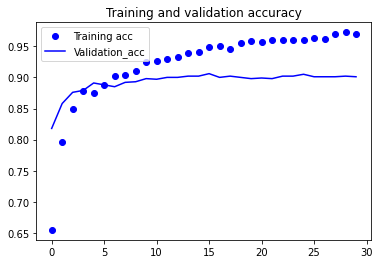

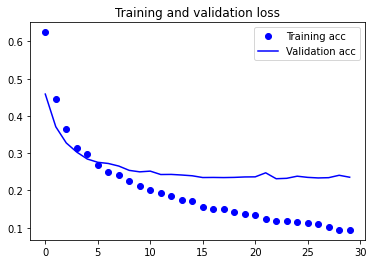

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo',label = 'Training acc')
plt.plot(epochs, val_loss, 'b',label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()



